In [23]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Data

In [19]:
wrong_filename = '../spirals/WRONG-master_file_vflag_10_smooth2-27.txt'
corrected_filename = '../spirals/Pipe3D-master_file_vflag_10_smooth2-27.txt'

In [20]:
wrong_data = Table.read(wrong_filename, format='ascii.ecsv')
corrected_data = Table.read(corrected_filename, format='ascii.ecsv')

##### Remove bad galaxies

In [27]:
bad_boolean_wrong = np.logical_or(wrong_data['curve_used'] == 'non', 
                                  wrong_data['curve_used'] == 'none')
bad_boolean = np.logical_or(corrected_data['curve_used'] == 'non', 
                            corrected_data['curve_used'] == 'none')

# We want to keep the same galaxies, so we want to remove any galaxy 
# that is "bad" in either data file
either_bad_boolean = np.logical_or(bad_boolean_wrong, bad_boolean)

wrong_good_galaxies = wrong_data[np.logical_not(either_bad_boolean)]
good_galaxies = corrected_data[np.logical_not(either_bad_boolean)]

# $M_\text{DM}/M_*$ comparison

(0, 200)

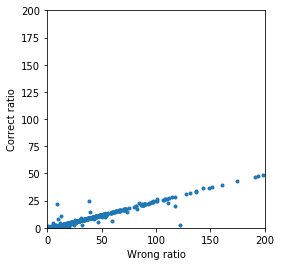

In [34]:
%matplotlib inline

plt.figure()

plt.plot(wrong_good_galaxies['Mdark_Mstar_ratio'], good_galaxies['Mdark_Mstar_ratio'], '.')

plt.xlabel('Wrong ratio')
plt.ylabel('Correct ratio')

plt.axis('square')

plt.xlim((0,200))
plt.ylim((0,200))

##### Not all the same galaxies are kept / removed.  Which ones changed?

In [35]:
changed_galaxies = bad_boolean_wrong != bad_boolean

In [36]:
corrected_data[changed_galaxies]

MaNGA_plate,MaNGA_fiberID,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,Z12logOH,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH_O3N2,Z12logOH_N2O2,Z12logOH_N2,u_r,frac_masked_spaxels,smoothness_score
,,,,,,deg,deg,,deg,,,,km / s,km / s,,,,km / s,km / s,,,,km / s,km / s,,,,erg / (cm2 s),erg / (cm2 s),solMass,solMass,solMass,solMass,solMass,,,,kpc,kpc,kpc,kpc,kpc,kpc,,,,,,,,,,,,,,,,
int64,int64,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str3,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
7992,3703,351,450,51695,24552,255.7156505502501,62.60309107156912,0.39985538,11.332703,0.056426346,46794870000.0,-9.0,130.11371230554283,68.95987390929214,3.865787977268144,19.93404552696205,28.659836970633005,107.2943107992639,7.253462048870587,82.48122751680522,7.583917312166595e-10,48.34110287297777,175.82615289043855,9003138303.252234,5.144112558038412,1077510786.134735,39.125737847295376,0.07043346017599106,0.0012639839485286,-1.0,-1.0,-1.0,-1.0,59484135014.85221,-1.0,-1.0,-20.6281795501709,2.00710385622847,1.2833130651205322,1.9462398367843592,0.23442517725690754,3.502127250533787,141382433.428999,nan,-0.9830906969569346,2.162970701215784,1.0,non,4,28.659836970633005,48.34110287297777,39.125737847295376,200155,10.122070664722893,9.739782309863013,9.370965106979394,2.6351234316825867,0.1134020618556701,2.0127172490255023
7977,12705,0,0,0,635923,332.89283800788445,11.795928663489386,0.6698726,174.14532,0.026948685,52217352000.0,-9.0,327.63074062081955,44.463906485494824,0.9357400753208082,0.41098653369203136,2674.2132676359747,526.1852489042375,115.71013624668522,0.6574241352437774,0.31282923908757465,22665.381891334124,194.16581525691421,26.011479279657873,1.5584400056955277,1.157429742786952,77.41918687599788,0.33759286999702454,0.00593389683120362,51500192984.89239,13798476376.133507,-55692111568.70878,13798476376.133507,107192304553.60117,-0.5195532627144901,0.12872637111028454,-21.046524047851562,0.6767244155225286,0.3145186993884355,0.4512695141779178,0.32625176591256577,1.3708855203435666,0.5047632014127638,nan,nan,nan,nan,neg,1,243.11029705781587,2060.489262848557,7.038107897817989,-1,nan,nan,nan,2.207711488008499,0.018023430459597478,1.1674996624302156
9872,3704,1679,119,53149,341244,234.1276693167207,41.17476307725181,0.9675,46.30591,0.054738514,28745695000.0,1.0,267.3892883209081,12.296241989838595,4.259490083222744,1.685061186117212,42.30771652984579,291.3280003955952,3.2002714600961997,110.26233628327732,129728857.08192298,14.09973574413024,216.7422294837214,39.50479029452487,2.8047133877272254,3.4107579175770106,174.37066683188382,0.1596277803182602,0.00195107109631874,141297491140.5395,3104339879.8222017,82801224920.87552,3104339879.8222017,58496266219.66397,1.415495898660302,0.05306902611809186,-20.621030807495117,2.217533269754909,0.19823372222267388,1.8262329044423988,0.06298873766637596,1.8111462952030664,0.4527608962821939,nan,nan,nan,3.0,pos,4,21.153858264922896,7.04986787206512,87.18533341594191,1410204,10.40254872976474,9.375480697942724,9.24898808588269,2.073202431201935,0.03457943925233645,1.1110909564451235
8552,12703,1677,405,53148,340823,227.40587